# PROJECT 1
# Airbnb Data Seattle City 

## Business Understanding

Based on the data available we ask ourselves the following questions:

1. What is the distribution of property types listed on Airbnb in Seattle? (e.g., apartments, houses, condos) And their average prices? 

2. Is there a correlation between the number of reviews and the rental price? 

3.  What are the most common cancellation policies among Airbnb hosts in Seattle?


## Import data and Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')

Import data 

In [2]:
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

Data snapshots

In [3]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [5]:
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


## Qn 1:  What is the distribution of property types listed on Airbnb in Seattle? (e.g., apartments, houses, condos) And their average prices? 

In this analysis, we want to understand the different types of properties listed and their distinguishing prices amongst neighborhoods in the city of Seattle. We specifically want to understand the type of housing that has the highest prices and those with low prices

In [6]:
list(listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [7]:
df = listings.copy()
df_qn1 = df[['id', 'neighbourhood_cleansed', 'city', 'property_type', 'room_type', 'price','number_of_reviews','review_scores_rating']]

## Data Understanding

In [8]:
df_qn1.head()

,id,neighbourhood_cleansed,city,property_type,room_type,price,number_of_reviews,review_scores_rating
0,241032,West Queen Anne,Seattle,Apartment,Entire home/apt,$85.00,207,95.0
1,953595,West Queen Anne,Seattle,Apartment,Entire home/apt,$150.00,43,96.0
2,3308979,West Queen Anne,Seattle,House,Entire home/apt,$975.00,20,97.0
3,7421966,West Queen Anne,Seattle,Apartment,Entire home/apt,$100.00,0,NaN
4,278830,West Queen Anne,Seattle,House,Entire home/apt,$450.00,38,92.0


### Handle Missing Data

In [9]:
df_qn1.shape

(3818, 8)

In [10]:
df_qn1.isnull().sum()

id                          0
neighbourhood_cleansed      0
city                        0
property_type               1
room_type                   0
price                       0
number_of_reviews           0
review_scores_rating      647
dtype: int64

In [11]:
## Drop all respondents who have no working language
df_qn1 = df_qn1.dropna()

In [12]:
df_qn1.shape

(3171, 8)

### Data Processing 

In [13]:
## Define 
df_qn1.property_type.unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Yurt', 'Chalet', 'Tent', 'Treehouse'],
      dtype=object)

In [14]:
df_qn1.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [15]:
pd.crosstab(df_qn1['room_type'], df_qn1['property_type'])

property_type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt
room_type,,,,,,,,,,,,,,,,
Entire home/apt,1198,2,3,8,16,7,1,54,0,759,26,11,3,35,1,1
Private room,191,23,2,1,5,3,1,14,0,657,7,6,0,43,1,0
Shared room,39,1,0,0,0,0,0,1,2,44,0,2,1,2,0,0


In [16]:
df_qn1.head()

,id,neighbourhood_cleansed,city,property_type,room_type,price,number_of_reviews,review_scores_rating
0,241032,West Queen Anne,Seattle,Apartment,Entire home/apt,$85.00,207,95.0
1,953595,West Queen Anne,Seattle,Apartment,Entire home/apt,$150.00,43,96.0
2,3308979,West Queen Anne,Seattle,House,Entire home/apt,$975.00,20,97.0
4,278830,West Queen Anne,Seattle,House,Entire home/apt,$450.00,38,92.0
5,5956968,West Queen Anne,Seattle,House,Private room,$120.00,17,95.0


In [17]:
# make id the index
df_qn1.set_index('id', inplace=True)

### Evaluate the Results

Text(0, 0.5, 'Count of Property')

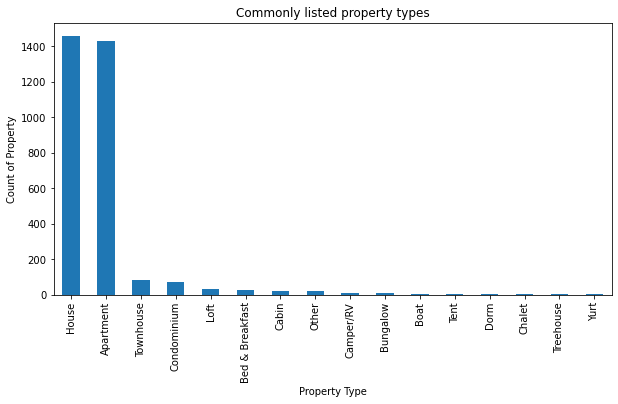

In [18]:
plt.figure(figsize=(10, 5))
plt.title('Commonly listed property types')
ax =df_qn1['property_type'].value_counts().plot(kind='bar')
plt.xlabel('Property Type')
plt.ylabel('Count of Property')
# ax = df_qn1['property_type'].count().plot(kind='bar')

In [19]:
# join listing data and calendar to differentiate prices of properties
df_qn1.head(3)

,neighbourhood_cleansed,city,property_type,room_type,price,number_of_reviews,review_scores_rating
id,,,,,,,
241032,West Queen Anne,Seattle,Apartment,Entire home/apt,$85.00,207,95.0
953595,West Queen Anne,Seattle,Apartment,Entire home/apt,$150.00,43,96.0
3308979,West Queen Anne,Seattle,House,Entire home/apt,$975.00,20,97.0


In [20]:
# strip off dollar sign to use the price column
df_qn1['price'] = df_qn1['price'].str.replace(',', '').str.replace('$', '').astype(float)

### Computing the average price per property type

In [21]:
grouped_prices = df_qn1.groupby('property_type')
mean_property =grouped_prices.mean()
print(mean_property.sort_values(by=['price'], ascending=False))

                      price  number_of_reviews  review_scores_rating
property_type                                                       
Boat             357.000000          13.400000             95.600000
Condominium      148.884058          10.637681             95.318841
Loft             139.484848          54.878788             95.454545
House            130.195205          27.732192             94.833562
Treehouse        124.000000          15.000000             96.000000
Apartment        123.630252          25.364846             93.977591
Townhouse        121.637500          13.962500             96.625000
Cabin            104.666667          92.571429             96.238095
Yurt             100.000000          25.000000            100.000000
Chalet            98.500000           6.000000             83.500000
Other             98.421053          37.842105             96.263158
Bungalow          98.222222           8.222222             97.666667
Bed & Breakfast   94.153846       

Plotting the average price vs property type

Text(0, 0.5, 'Average price')

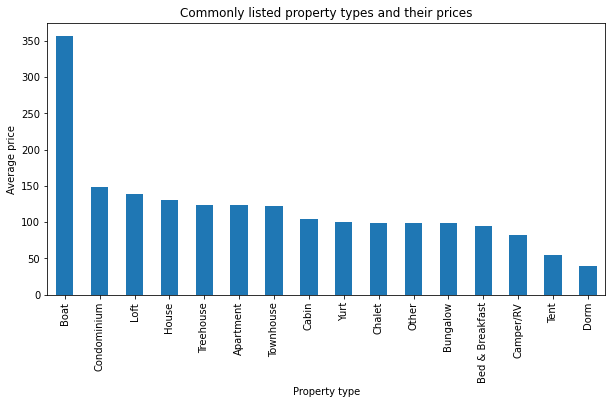

In [22]:
plt.figure(figsize=(10, 5))
plt.title('Commonly listed property types and their prices')
ax =mean_property['price'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Property type')
plt.ylabel('Average price')
# ax = df_qn1['property_type'].count().plot(kind='bar')

In [ ]:
# mean_property.corr()

## Qn 2. Is there a correlation between the number of reviews and the rental price?
We want to understand how the differently listed properties differ by reviews and prices. Specifically, we examine the existing relationship between  prices, number of reviews and ratings. 

In [23]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [24]:
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [25]:
# Is there a correlation between the number of reviews and the rental price
df_qn1.head(2)

,neighbourhood_cleansed,city,property_type,room_type,price,number_of_reviews,review_scores_rating
id,,,,,,,
241032,West Queen Anne,Seattle,Apartment,Entire home/apt,85.0,207,95.0
953595,West Queen Anne,Seattle,Apartment,Entire home/apt,150.0,43,96.0


In [26]:
df_qn2 = df_qn1.copy()

In [27]:
df_qn2.describe()

,price,number_of_reviews,review_scores_rating
count,3171.000000,3171.000000,3171.000000
mean,126.802586,26.751498,94.539262
std,90.007172,39.914223,6.606083
min,22.000000,1.000000,20.000000
25%,75.000000,4.000000,93.000000
50%,100.000000,13.000000,96.000000
75%,150.000000,32.000000,99.000000
max,1000.000000,474.000000,100.000000


In [30]:
df_qn2[['price','number_of_reviews','review_scores_rating']].corr()

,price,number_of_reviews,review_scores_rating
price,1.000000,-0.133654,0.055551
number_of_reviews,-0.133654,1.000000,0.036242
review_scores_rating,0.055551,0.036242,1.000000


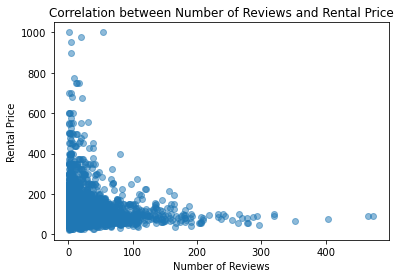

In [32]:
# Plotting the scatter plot
plt.scatter(df_qn2['number_of_reviews'], df_qn2['price'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Rental Price')
plt.title('Correlation between Number of Reviews and Rental Price')
plt.show()

In [ ]:
# Creating a scatter plot
plt.scatter(df_qn2['price'], df_qn2['number_of_reviews'])
plt.title('Price vs. number_of_reviews ')
plt.xlabel('Price in $')
plt.ylabel('Count of reviews')
plt.show()

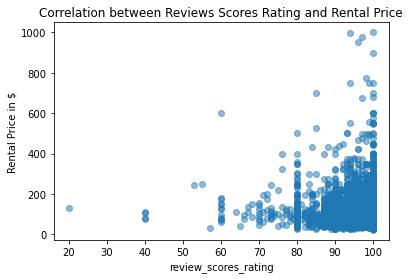

In [33]:
# Plotting the scatter plot
plt.scatter(df_qn2['review_scores_rating'], df_qn2['price'], alpha=0.5)
plt.xlabel('review_scores_rating')
plt.ylabel('Rental Price in $')
plt.title('Correlation between Reviews Scores Rating and Rental Price')
plt.show()

## Qn3.  What are the most common cancellation policies among Airbnb hosts in Seattle?
We would like to understand the different cancellation policies among Airbnb hosts to provide different insights to guests. Among other reasons, cancellation policies influence decision making among guests as they will be provided with information on flexibility of the property. Also, the policies can provide a road map to hosts on price setting that will then impact their revenue.

In [35]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [36]:
df = listings.copy()
df_qn3 = df[['id', 'neighbourhood_cleansed', 'city', 'property_type', 'room_type', 'price','number_of_reviews','review_scores_rating','cancellation_policy','host_is_superhost']]


In [37]:
df_qn3.head(2)

,id,neighbourhood_cleansed,city,property_type,room_type,price,number_of_reviews,review_scores_rating,cancellation_policy,host_is_superhost
0,241032,West Queen Anne,Seattle,Apartment,Entire home/apt,$85.00,207,95.0,moderate,f
1,953595,West Queen Anne,Seattle,Apartment,Entire home/apt,$150.00,43,96.0,strict,t


In [38]:
# remove the dollar sign from prices
df_qn3['price'] = df_qn3['price'].str.replace(',', '').str.replace('$', '').astype(float)

In [39]:
# set id as index
df_qn3.set_index('id', inplace=True)

Check for null values 

In [40]:
df_qn3.isnull().sum()

neighbourhood_cleansed      0
city                        0
property_type               1
room_type                   0
price                       0
number_of_reviews           0
review_scores_rating      647
cancellation_policy         0
host_is_superhost           2
dtype: int64

In [41]:
# print the existing cancellation policies
list(df_qn3.cancellation_policy.unique())

['moderate', 'strict', 'flexible']

In [42]:
# summarize the data by cancellation policy
print(df_qn3.groupby('cancellation_policy').mean())

                          price  number_of_reviews  review_scores_rating
cancellation_policy                                                     
flexible             109.534783          12.362609             94.810256
moderate             114.775380          29.248601             94.671958
strict               154.597036          24.023994             94.251392


In [43]:
cancellation_policy_distribution = df_qn3['cancellation_policy'].value_counts()
# Print the most common cancellation policies
print("The most common cancellation policies among Airbnb hosts in Seattle are:")
print(cancellation_policy_distribution)

The most common cancellation policies among Airbnb hosts in Seattle are:
strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64


In [44]:
# crosstab between hosts type and cancellation policy
pd.crosstab(df_qn3['cancellation_policy'], df_qn3['host_is_superhost'], normalize='index')

host_is_superhost,f,t
cancellation_policy,,
flexible,0.876414,0.123586
moderate,0.759200,0.240800
strict,0.763585,0.236415


In [46]:

# Calculate the percentage of listings for each cancellation policy type
cancellation_policy_percentages = (cancellation_policy_distribution / len(df_qn3)) * 100

# Print the percentages for each cancellation policy
print("Percentage of listings with each cancellation policy:")
print(cancellation_policy_percentages)

Percentage of listings with each cancellation policy:
strict      37.113672
moderate    32.765846
flexible    30.120482
Name: cancellation_policy, dtype: float64
